Enter Seed no: 2

Initial Process List:
PID | Arrival Time | Burst Time
----+--------------+------------
  1 |            1 |          2
  2 |            2 |          6
  3 |            5 |          5
  4 |            8 |         10
  5 |            6 |         10
  6 |            1 |         10
  7 |            5 |          7
  8 |           12 |          9
  9 |           11 |          9
 10 |           14 |          9
 11 |            8 |          1
 12 |            0 |          6
 13 |           14 |          6
 14 |           12 |          7
 15 |            5 |          9
 16 |            5 |          4
 17 |            7 |          1
 18 |            5 |          6
 19 |            5 |          3
 20 |           11 |          9
 21 |            5 |          8
 22 |           13 |          9
 23 |           11 |         10
 24 |           11 |          6
 25 |           14 |          3

--- FCFS Scheduling ---
PID | Arrival | Burst | Completion | Waiting | Turnaround
----+-------

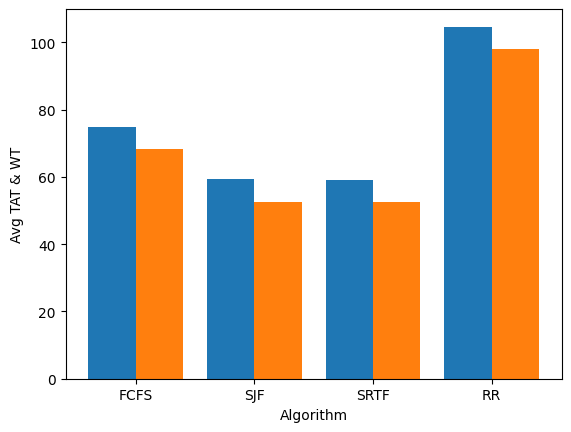

In [18]:
import random
import matplotlib.pyplot as plt
import numpy as np
class Process:
    def __init__(self, pid, arrival_time, burst_time):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time
        self.start_time = -1
        self.completion_time = -1
        self.waiting_time = 0
        self.turnaround_time = 0

    def reset(self):
        self.remaining_time = self.burst_time
        self.start_time = -1
        self.completion_time = -1
        self.waiting_time = 0
        self.turnaround_time = 0

class allAlgos:
    def __init__(self, processes):
        self.original_processes = processes

    def clone_processes(self):
        return [Process(p.pid, p.arrival_time, p.burst_time) for p in self.original_processes]

    def show(self, processes):
        print("\nInitial Process List:")
        print("PID | Arrival Time | Burst Time")
        print("----+--------------+------------")
        for p in processes:
            print(f"{p.pid:3} | {p.arrival_time:12} | {p.burst_time:10}")

    table=[]

    def srtf_scheduling(self):
        print("\n--- SRTF Scheduling ---")
        processes = self.clone_processes()
        current_time = 0
        completed = 0
        n = len(processes)
        ready_queue = []
        total_waiting_time = 0
        total_turnaround_time = 0
        timeline = []

        processes.sort(key=lambda x: x.arrival_time)

        while completed != n:
            for p in processes:
                if p.arrival_time <= current_time and p.remaining_time > 0 and p not in ready_queue:
                    ready_queue.append(p)

            if not ready_queue:
                current_time += 1
                continue

            ready_queue.sort(key=lambda x: x.remaining_time)
            current_process = ready_queue[0]

            if current_process.start_time == -1:
                current_process.start_time = current_time

            timeline.append((current_time, current_process.pid))
            current_process.remaining_time -= 1
            current_time += 1

            if current_process.remaining_time == 0:
                current_process.completion_time = current_time
                current_process.turnaround_time = current_process.completion_time - current_process.arrival_time
                current_process.waiting_time = current_process.turnaround_time - current_process.burst_time
                total_waiting_time += current_process.waiting_time
                total_turnaround_time += current_process.turnaround_time
                completed += 1
                ready_queue.pop(0)

        print("\nPID | Arrival | Burst | Start | Completion | Waiting | Turnaround")
        print("----+---------+-------+-------+------------+---------+-----------")
        for p in sorted(processes, key=lambda x: x.pid):
            print(f"{p.pid:3} | {p.arrival_time:7} | {p.burst_time:5} | {p.start_time:5} | {p.completion_time:10} | {p.waiting_time:7} | {p.turnaround_time:10}")

        avg_waiting = total_waiting_time / n
        avg_turnaround = total_turnaround_time / n
        self.table.append(["SRTF",avg_turnaround,avg_waiting])


        print(f"\nAverage Waiting Time: {avg_waiting:.2f}")
        print(f"Average Turnaround Time: {avg_turnaround:.2f}")

    def fcfs_scheduling(self):
        print("\n--- FCFS Scheduling ---")
        processes = self.clone_processes()
        processes.sort(key=lambda x: x.arrival_time)

        total_waiting_time = 0
        total_turnaround_time = 0
        current_time = 0
        print("PID | Arrival | Burst | Completion | Waiting | Turnaround")
        print("----+---------+-------+------------+---------+-----------")

        for p in processes:
            if current_time < p.arrival_time:
                current_time = p.arrival_time

            p.start_time = current_time
            p.completion_time = current_time + p.burst_time
            p.turnaround_time = p.completion_time - p.arrival_time
            p.waiting_time = p.turnaround_time - p.burst_time

            total_waiting_time += p.waiting_time
            total_turnaround_time += p.turnaround_time

            current_time = p.completion_time

        for p in sorted(processes, key=lambda x: x.pid):
            print(f"{p.pid:3} | {p.arrival_time:7} | {p.burst_time:5} | {p.completion_time:10} | {p.waiting_time:7} | {p.turnaround_time:10}")

        avg_waiting = total_waiting_time / len(processes)
        avg_turnaround = total_turnaround_time / len(processes)
        self.table.append(["FCFS",avg_turnaround,avg_waiting])

        print(f"\nAverage Waiting Time: {avg_waiting:.2f}")
        print(f"Average Turnaround Time: {avg_turnaround:.2f}\n")

    def round_robin(self):
        print("Enter time quantum: ")
        time_quantum = int(input())
        processes = self.clone_processes()
        processes.sort(key=lambda x: x.arrival_time)
        total_waiting_time = 0
        total_turnaround_time = 0
        complete_time = 0
        n = len(processes)
        complete = 1
        total_turnaround_time = 0
        total_waiting_time = 0

        while complete <= n:
            for process in processes:
                if process.remaining_time > 0:
                    executed_time = min(time_quantum, process.remaining_time)
                    process.remaining_time -= executed_time
                    complete_time += executed_time
                    if process.remaining_time == 0:
                        turnaround_time = complete_time - process.arrival_time
                        waiting_time = turnaround_time - process.burst_time
                        total_turnaround_time = total_turnaround_time + turnaround_time
                        total_waiting_time = total_waiting_time + waiting_time
                        process.completion_time = complete_time
                        process.turnaround_time = turnaround_time
                        process.waiting_time = waiting_time
                        complete += 1

        print("\n--- RR Scheduling for TQ ", time_quantum, "---")
        print("PID | Arrival | Burst | Completion | Waiting | Turnaround")
        print("----+---------+-------+------------+---------+-----------")
        for p in sorted(processes, key=lambda x: x.pid):
            print(f"{p.pid:3} | {p.arrival_time:7} | {p.burst_time:5} | {p.completion_time:10} | {p.waiting_time:7} | {p.turnaround_time:10}")

        avg_waiting = total_waiting_time / n
        avg_turnaround = total_turnaround_time / n
        self.table.append(["RR",avg_turnaround,avg_waiting])

        print(f"\nAverage Waiting Time: {avg_waiting:.2f}")
        print(f"Average Turnaround Time: {avg_turnaround:.2f}")

    def sjf_scheduling(self):
        print("\n--- SJF (Non-Preemptive) Scheduling ---")
        processes = self.clone_processes()
        time = 0
        remaining = processes.copy()

        remaining.sort(key=lambda p: p.arrival_time)
        completed_processes = []

        while remaining:
            ready_queue = [p for p in remaining if p.arrival_time <= time]

            if not ready_queue:
                time = min(p.arrival_time for p in remaining)
                continue

            current = min(ready_queue, key=lambda p: p.burst_time)

            current.start_time = time
            current.completion_time = time + current.burst_time
            current.turnaround_time = current.completion_time - current.arrival_time
            current.waiting_time = current.turnaround_time - current.burst_time

            completed_processes.append(current)
            remaining.remove(current)

            time = current.completion_time

        print("PID | Arrival | Burst | Completion | Waiting | Turnaround")
        print("----+---------+-------+-------+------------+---------+-----------")
        total_turnaround_time = 0
        total_waiting_time = 0
        for p in sorted(completed_processes, key=lambda x: x.pid):
            print(f"{p.pid:3} | {p.arrival_time:7} | {p.burst_time:5} | {p.completion_time:10} | {p.waiting_time:7} | {p.turnaround_time:10}")
            total_turnaround_time += p.turnaround_time
            total_waiting_time += p.waiting_time

        avg_turnaround = total_turnaround_time / len(completed_processes)
        avg_waiting = total_waiting_time / len(completed_processes)
        self.table.append(["SJF",avg_turnaround,avg_waiting])

        print(f"\nAverage Waiting Time: {avg_waiting:.2f}")
        print(f"Average Turnaround Time: {avg_turnaround:.2f}")

    def table_show(self):
        print("\n____Comparison Table____")
        print("Algorithm | Avg TAT | Avg WT ")
        print("----------+---------+--------")
        for p in self.table:
            print(f"{p[0]:9} | {p[1]:7} | {p[2]:6}")

    def plot(self):
        cats,v1,v2=[],[],[]
        for p in self.table:
            cats.append(p[0])
            v1.append(p[1])
            v2.append(p[2])
        w, x = 0.4, np.arange(len(cats))

        plt.bar(x - w/2, v1, w, label='Set 1')
        plt.bar(x + w/2, v2, w, label='Set 2')

        plt.xticks(x, cats)
        plt.xlabel('Algorithm')
        plt.ylabel('Avg TAT & WT')

# -------- Main -------- #
if __name__ == "__main__":
    s=int(input("Enter Seed no: "))
    random.seed(s)
    processes = []
    num_processes = 25

    for pid in range(1, num_processes + 1):
        arrival = random.randint(0, 15)
        burst = random.randint(1, 10)
        processes.append(Process(pid, arrival, burst))

    scheduler = allAlgos(processes)
    scheduler.show(processes)

    scheduler.fcfs_scheduling()
    scheduler.sjf_scheduling()
    scheduler.srtf_scheduling()
    scheduler.round_robin()
    scheduler.table_show()
    scheduler.plot()